# One Max Problem
For this, we are experimenting with all of the different parameters for the SA. 

This will then be compared to the other 3 algorithms on a basis of:
1. wall clock time
2. differing problem sizes
3. number of function calls per iteration.

In [60]:
import mlrose_hiive
from mlrose_hiive import QueensGenerator, FlipFlopGenerator, TSPGenerator
from mlrose_hiive import DiscreteOpt
from mlrose_hiive import OneMax
from mlrose_hiive import SARunner, RHCRunner, MIMICRunner, GARunner
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import time
import seaborn as sb

In [61]:
SIZE = 20
results = {}
SEED = 2

In [62]:
problem = DiscreteOpt(SIZE, OneMax())

## SA Tuning

#### Max Attempts

Time 0.0
Score 12.0
Iterations 2
Time 0.0030028820037841797
Score 19.0
Iterations 179
Time 0.0030028820037841797
Score 20.0
Iterations 222
Time 0.0030028820037841797
Score 20.0
Iterations 256
Time 0.004003763198852539
Score 20.0
Iterations 283
Time 0.005004167556762695
Score 20.0
Iterations 343
Time 0.0050046443939208984
Score 20.0
Iterations 315


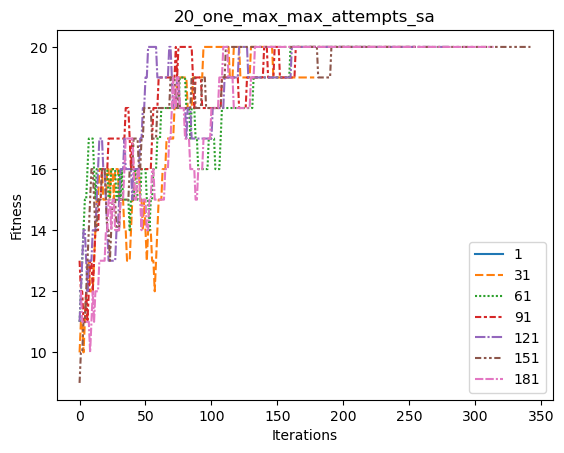

In [63]:
name = f'{SIZE}_one_max_max_attempts_sa'
plot_df = pd.DataFrame(index=range(1000))

for param in np.arange(1, 200, 30):
    start = time.time()
    fitness_curve = mlrose_hiive.simulated_annealing(
        problem,
        max_attempts=int(param),
        curve=True,
    )
    print("Time", time.time() - start)
    print("Score", fitness_curve[1])
    print("Iterations", len(fitness_curve[2]))
#     print("Value", fitness_curve[0])
    plot_df[param] = pd.Series([x[0] for x in fitness_curve[2]])

plot = sb.lineplot(data=plot_df)
plot.set(xlabel='Iterations', ylabel='Fitness', title=name);
plt.savefig(f'{name}.png')

#### Decay

In [64]:
decays = {
    'geom': mlrose_hiive.GeomDecay(),
    'exp': mlrose_hiive.ExpDecay(),
    'arith': mlrose_hiive.ArithDecay()
}

Time 0.0050051212310791016
Score 20.0
Iterations 361
Time 0.008007287979125977
Score 20.0
Iterations 489
Time 0.11811494827270508
Score 20.0
Iterations 8599


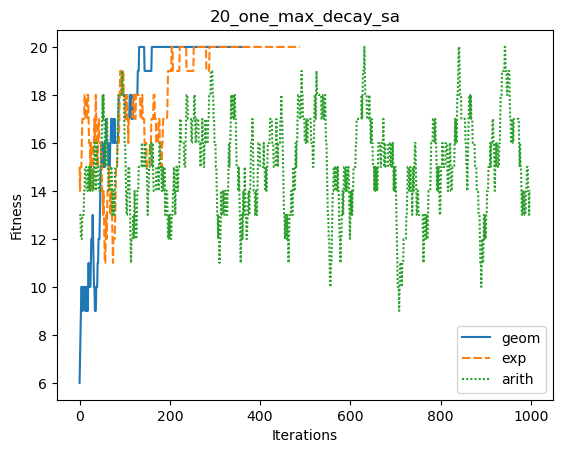

In [65]:
name = f'{SIZE}_one_max_decay_sa'
plot_df = pd.DataFrame(index=range(1000))

for k, v in decays.items():
    start = time.time()
    fitness_curve = mlrose_hiive.simulated_annealing(
        problem,
        max_attempts=200,
        schedule=v,
        curve=True,
    )
    print("Time", time.time() - start)
    print("Score", fitness_curve[1])
    print("Iterations", len(fitness_curve[2]))
#     print("Value", fitness_curve[0])
    plot_df[k] = pd.Series([x[0] for x in fitness_curve[2]])

plot = sb.lineplot(data=plot_df)
plot.set(xlabel='Iterations', ylabel='Fitness', title=name);
plt.savefig(f'{name}.png')

## RHC, SA, GA, and MIMIC

In [66]:
results = {}

In [67]:
name = f'{SIZE}one_max_rhc'
problem = DiscreteOpt(SIZE, OneMax())
results[name] = {}
start = time.time()
results[name]['fitness'] = mlrose_hiive.random_hill_climb(
    problem, 
    max_attempts=100, 
    curve=True,
    random_state=SEED,
    restarts=10
)
results[name]['time'] = time.time() - start

In [68]:
name = f'{SIZE}one_max_sa'
problem = DiscreteOpt(SIZE, OneMax())
results[name] = {}
start = time.time()
results[name]['fitness'] = mlrose_hiive.simulated_annealing(    
    problem, 
    max_attempts=150, 
    curve=True,
    random_state=SEED
)
results[name]['time'] = time.time() - start

In [69]:
name = f'{SIZE}one_max_ga'
problem = DiscreteOpt(SIZE, OneMax())
results[name] = {}
start = time.time()
results[name]['fitness'] = mlrose_hiive.genetic_alg(
    problem,
    pop_size=100,
    pop_breed_percent=.5,
    elite_dreg_ratio=.95,
    mutation_prob=0,
    max_attempts=100,
    curve=True,
    random_state=SEED
)
results[name]['time'] = time.time() - start

In [70]:
name = f'{SIZE}one_max_mimic'
problem = DiscreteOpt(SIZE, OneMax())
results[name] = {}
start = time.time()
results[name]['fitness'] = mlrose_hiive.mimic(
    problem,
    pop_size=100,
    keep_pct=.2,
    max_attempts=1,
    curve=True,
    random_state=SEED
)
results[name]['time'] = time.time() - start

In [71]:
df = pd.DataFrame()

In [72]:
df['rhc'] = pd.Series([x[0] for x in results[f'{SIZE}one_max_rhc']['fitness'][2]])
df['sa'] =  pd.Series([x[0] for x in results[f'{SIZE}one_max_sa']['fitness'][2]])
df['ga'] =  pd.Series([x[0] for x in results[f'{SIZE}one_max_ga']['fitness'][2]])
df['mimic'] =  pd.Series([x[0] for x in results[f'{SIZE}one_max_mimic']['fitness'][2]])

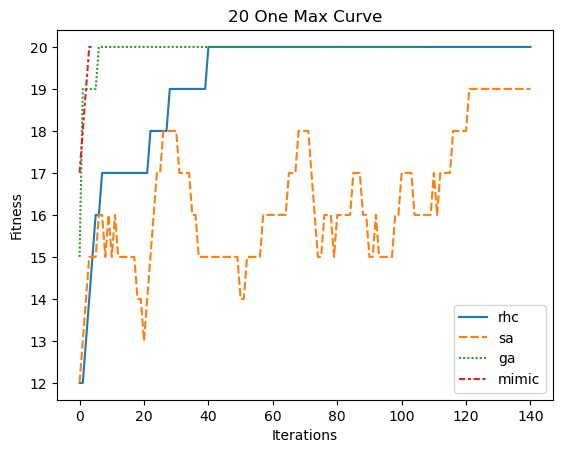

In [73]:
plot = sb.lineplot(data=df)
plot.set(xlabel='Iterations', ylabel='Fitness', title=f'{SIZE} One Max Curve');
plt.savefig(f'{SIZE}one_max_curve.png')

In [74]:
for key in results:
    print('Algorithm', key)
    print('Value', results[key]['fitness'][0])
    print('Score', results[key]['fitness'][1])
    print('Evals', results[key]['fitness'][2][-1][-1])
    print('Iterations', len(results[key]['fitness'][2]))
    print('Average Evals Per Iteration', results[key]['fitness'][2][-1][-1] / len(results[key]['fitness'][2]))
    print('Time', results[key]['time'])
    print()

Algorithm 20one_max_rhc
Value [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Score 20.0
Evals 149.0
Iterations 141
Average Evals Per Iteration 1.0567375886524824
Time 0.017015695571899414

Algorithm 20one_max_sa
Value [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Score 20.0
Evals 392.0
Iterations 348
Average Evals Per Iteration 1.1264367816091954
Time 0.006005048751831055

Algorithm 20one_max_ga
Value [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Score 20.0
Evals 10910.0
Iterations 107
Average Evals Per Iteration 101.96261682242991
Time 0.26417088508605957

Algorithm 20one_max_mimic
Value [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Score 20.0
Evals 609.0
Iterations 5
Average Evals Per Iteration 121.8
Time 0.37860965728759766



In [75]:
mlrose_hiive.GeomDecay().evaluate(1000)

0.001

In [76]:
mlrose_hiive.ExpDecay().evaluate(1000)

0.006737946999085467

In [77]:
mlrose_hiive.ArithDecay().evaluate(1000)

0.9